In [1]:
import pandas as pd
df = pd.read_csv('TaxiFlota.csv' , encoding = 'latin-1', sep = ";")
df.head(10)

,Código,Matrícula,Fecha Matriculación,Marca,Modelo,Tipo,Variante,Clasificación medioambiental,Combustible,Cilindrada,Potencia,Número de Plazas,Fecha inicio de prestación del servicio de taxi,Eurotaxi,Régimen Especial de Eurotaxi,Fecha inicio Régimen Especial Eurotaxi,Fecha fin Régimen Especial Eurotaxi,Fecha
0,1020144,2239DTJ,13/12/2005,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018
1,550040,8901GJP,21/11/2008,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018
2,550016,6364FVW,14/12/2007,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,12.00,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018
3,550115,4249GST,08/01/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018
4,550142,1561GVY,27/04/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018
5,550214,6296HBZ,28/02/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5,NaN,DIESEL,0,11.64,NaN,03/08/2012,NO,NO,NaN,NaN,30/07/2018
6,550241,9097GYH,16/08/2010,VOLKSWAGEN,PASSAT,3C,AACBBBX0/FM6FM6*******,NaN,DIESEL,0,13.00,NaN,10/01/2013,NO,NO,NaN,NaN,30/07/2018
7,550244,3091HJM,29/02/2012,PEUGEOT,508,8,8D9HRB/PS,NaN,DIESEL,0,82.00,NaN,23/08/2013,NO,NO,NaN,NaN,30/07/2018
8,1198109,0800GZC,18/10/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.00,5,25/10/2010,NO,NO,NaN,NaN,30/07/2018
9,1196804,7686GYS,23/09/2010,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.00,5,04/10/2010,NO,NO,NaN,NaN,30/07/2018


In [2]:
# 1. Renombrar columnas 
# 1.1 Cambiar los títulos a minúsculas

df.columns = df.columns.str.lower()
df

# 1.2 Sustituir espacios por "_"
df.columns = df.columns.str.replace(' ','_')

# 1.3 Quitar tildes
df.columns = df.columns.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u")

# 1.4 Renombrar manualmente las columnas con nombres más largos
df = df.rename(columns= {'numero_de_plazas':'numero_plazas',
                   'fecha_inicio_de_prestacion_del_servicio_de_taxi':'fecha_inicio', 
                   'regimen_especial_de_eurotaxi':'regimen_eurotaxi', 
                   'fecha_inicio_regimen_especial_eurotaxi':'fecha_inicio_eurotaxi', 
                   'fecha_fin_regimen_especial_eurotaxi':'fecha_fin_eurotaxi'})

# 1.5 Comprobar nombre de columnas
df.columns

Index(['codigo', 'matricula', 'fecha_matriculacion', 'marca', 'modelo', 'tipo',
       'variante', 'clasificacion_medioambiental', 'combustible', 'cilindrada',
       'potencia', 'numero_plazas', 'fecha_inicio', 'eurotaxi',
       'regimen_eurotaxi', 'fecha_inicio_eurotaxi', 'fecha_fin_eurotaxi',
       'fecha'],
      dtype='object')

In [3]:
# 2. Convertir variables
# 2.1 Inspeccionar el tipo de variables
df.dtypes

codigo                            int64
matricula                        object
fecha_matriculacion              object
marca                            object
modelo                           object
tipo                             object
variante                         object
clasificacion_medioambiental     object
combustible                      object
cilindrada                        int64
potencia                        float64
numero_plazas                    object
fecha_inicio                     object
eurotaxi                         object
regimen_eurotaxi                 object
fecha_inicio_eurotaxi            object
fecha_fin_eurotaxi               object
fecha                            object
dtype: object

In [4]:
## 2.2 Identificar las variables a cambiar
# codigo -> object
df.codigo = df.codigo.astype('object')

In [5]:
# matricula - > OK

In [6]:
# fecha_matriculación -> date

from datetime import date, datetime
import re
formato = '%d/%m/%Y'

def parsea_fecha(fecha):
    try:
        a = datetime.strptime(fecha,formato)
        return a
    except:
        return None

df.fecha_matriculacion = df.fecha_matriculacion.apply(parsea_fecha)

In [7]:
# marca -> OK

In [8]:
# modelo -> OK

In [9]:
# tipo -> OK

In [10]:
# variante -> OK

In [11]:
# clasificacion_medioambiental -> category
df["clasificacion_medioambiental"] = pd.Categorical(df["clasificacion_medioambiental"], ["0", "Eco", "C", "B"])
df["clasificacion_medioambiental"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8          B
9          C
10         B
11         B
12         B
13         B
14         B
15         C
16       NaN
17         C
18         C
19       NaN
20       NaN
21       NaN
22       NaN
23         C
24       NaN
25       NaN
26       NaN
27       NaN
28         C
29       NaN
        ... 
46912    NaN
46913      B
46914      C
46915      B
46916      B
46917      B
46918      B
46919      C
46920      C
46921    NaN
46922      C
46923    NaN
46924      B
46925      B
46926      B
46927    NaN
46928      C
46929      C
46930      B
46931      B
46932      B
46933      C
46934      B
46935      C
46936      C
46937      B
46938      B
46939      B
46940      B
46941      B
Name: clasificacion_medioambiental, Length: 46942, dtype: category
Categories (4, object): [0, Eco, C, B]

In [12]:
# combustible -> OK

In [13]:
# cilindrada -> OK

In [14]:
# potencia -> float

def a_numero(numero):
    try:
        a = pd.to_numeric(numero)
        return a
    except:
        return None

df.potencia = df.potencia.apply(a_numero)

In [15]:
# numero_plazas -> int

# num_plazas se puede crear una nueva columna que ponga el número de plazas para mobilidad reducida y
# luego añadir una columna con numero de plazas total

In [16]:
# fecha_inicio -> date
df.fecha_inicio = df.fecha_inicio.apply(parsea_fecha)

In [17]:
# eurotaxi -> obj
df.eurotaxi = df.eurotaxi.replace('SI', '1')
df.eurotaxi = df.eurotaxi.replace('NO', '0')

In [18]:
# regimen_eurotaxi -> obj
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('SI','1')
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('NO','0')

In [19]:
# fecha_inicio_eurotaxi -> date
df.fecha_inicio_eurotaxi= df.fecha_inicio_eurotaxi.apply(parsea_fecha)

In [20]:
# fecha_fin_eurotaxi -> date
df.fecha_fin_eurotaxi = df.fecha_fin_eurotaxi.apply(parsea_fecha)

In [21]:
# fecha -> date
df.fecha = df.fecha.apply(parsea_fecha)

In [22]:
# 2.3 Confirmar cambios
df.dtypes

codigo                                  object
matricula                               object
fecha_matriculacion             datetime64[ns]
marca                                   object
modelo                                  object
tipo                                    object
variante                                object
clasificacion_medioambiental          category
combustible                             object
cilindrada                               int64
potencia                               float64
numero_plazas                           object
fecha_inicio                    datetime64[ns]
eurotaxi                                object
regimen_eurotaxi                        object
fecha_inicio_eurotaxi           datetime64[ns]
fecha_fin_eurotaxi              datetime64[ns]
fecha                           datetime64[ns]
dtype: object

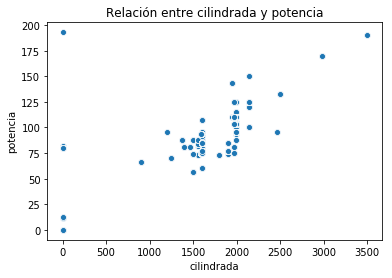

In [34]:
import seaborn as sns
grafico1 = sns.scatterplot(x='cilindrada', y='potencia', data=df).set_title('Relación entre cilindrada y potencia')

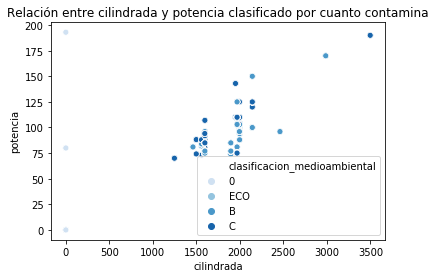

In [44]:
grafico2 = sns.scatterplot(x='cilindrada', y='potencia', data=df, hue= 'clasificacion_medioambiental', hue_order= ['0', 'ECO', 'B', 'C'], palette="Blues").set_title('Relación entre cilindrada y potencia clasificado por cuanto contamina')

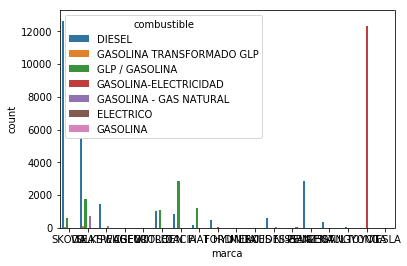

In [47]:
out = sns.countplot(x='marca', hue='combustible', data=df)

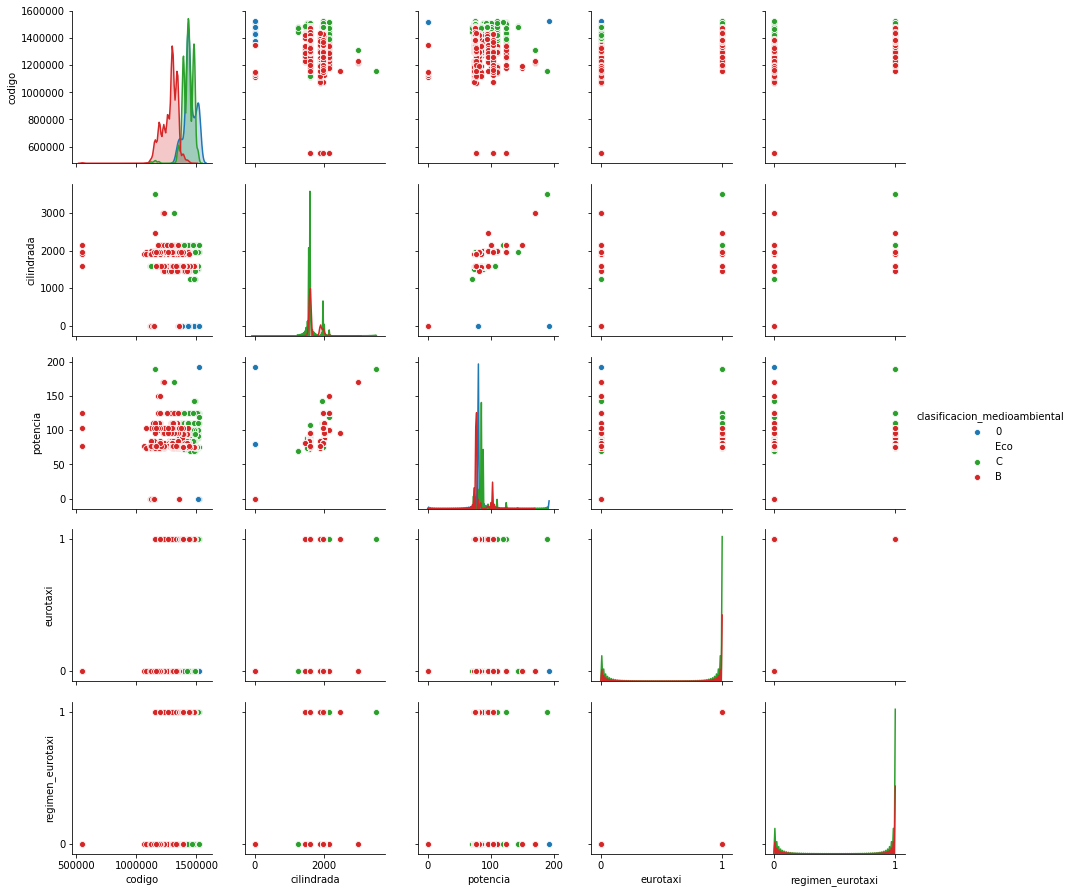

In [51]:
out = sns.pairplot(df, hue='clasificacion_medioambiental')